<a href="https://colab.research.google.com/github/rajendra11g/DL/blob/main/Regression_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regression Analysis

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
! pip install seaborn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
import seaborn as sns

In [4]:
%matplotlib inline

In [5]:
df=pd.read_csv('https://raw.githubusercontent.com/prateekef/workshopdata/main/Summary%20of%20Weather.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (7,8,18,25) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [6]:
df

,STA,Date,Precip,WindGustSpd,MaxTemp,MinTemp,MeanTemp,Snowfall,PoorWeather,YR,...,FB,FTI,ITH,PGT,TSHDSBRSGF,SD3,RHX,RHN,RVG,WTE
0,10001,1942-7-1,1.016,NaN,25.555556,22.222222,23.888889,0.0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,10001,1942-7-2,0,NaN,28.888889,21.666667,25.555556,0.0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,10001,1942-7-3,2.54,NaN,26.111111,22.222222,24.444444,0.0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,10001,1942-7-4,2.54,NaN,26.666667,22.222222,24.444444,0.0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,10001,1942-7-5,0,NaN,26.666667,21.666667,24.444444,0.0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119035,82506,1945-12-27,0,NaN,28.333333,18.333333,23.333333,0.0,NaN,45,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
119036,82506,1945-12-28,9.906,NaN,29.444444,18.333333,23.888889,0.0,1.0,45,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
119037,82506,1945-12-29,0,NaN,28.333333,18.333333,23.333333,0.0,1.0,45,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
119038,82506,1945-12-30,0,NaN,28.333333,18.333333,23.333333,0.0,NaN,45,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
df.shape

(119040, 31)

In [8]:
df.describe()

,STA,WindGustSpd,MaxTemp,MinTemp,MeanTemp,YR,MO,DA,DR,SPD,...,FT,FB,FTI,ITH,PGT,SD3,RHX,RHN,RVG,WTE
count,119040.000000,532.000000,119040.000000,119040.000000,119040.000000,119040.000000,119040.000000,119040.000000,533.000000,532.000000,...,0.0,0.0,0.0,0.0,525.000000,0.0,0.0,0.0,0.0,0.0
mean,29659.435795,37.774534,27.045111,17.789511,22.411631,43.805284,6.726016,15.797530,26.998124,20.396617,...,NaN,NaN,NaN,NaN,12.085333,NaN,NaN,NaN,NaN,NaN
std,20953.209402,10.297808,8.717817,8.334572,8.297982,1.136718,3.425561,8.794541,15.221732,5.560371,...,NaN,NaN,NaN,NaN,5.731328,NaN,NaN,NaN,NaN,NaN
min,10001.000000,18.520000,-33.333333,-38.333333,-35.555556,40.000000,1.000000,1.000000,2.000000,10.000000,...,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN
25%,11801.000000,29.632000,25.555556,15.000000,20.555556,43.000000,4.000000,8.000000,11.000000,16.000000,...,NaN,NaN,NaN,NaN,8.500000,NaN,NaN,NaN,NaN,NaN
50%,22508.000000,37.040000,29.444444,21.111111,25.555556,44.000000,7.000000,16.000000,32.000000,20.000000,...,NaN,NaN,NaN,NaN,11.600000,NaN,NaN,NaN,NaN,NaN
75%,33501.000000,43.059000,31.666667,23.333333,27.222222,45.000000,10.000000,23.000000,34.000000,23.250000,...,NaN,NaN,NaN,NaN,15.000000,NaN,NaN,NaN,NaN,NaN
max,82506.000000,75.932000,50.000000,34.444444,40.000000,45.000000,12.000000,31.000000,78.000000,41.000000,...,NaN,NaN,NaN,NaN,23.900000,NaN,NaN,NaN,NaN,NaN


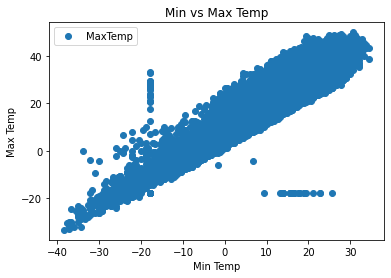

In [10]:
df.plot(x='MinTemp', y='MaxTemp', style='o')
plt.title('Min vs Max Temp')
plt.xlabel('Min Temp')
plt.ylabel('Max Temp')
plt.legend()
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


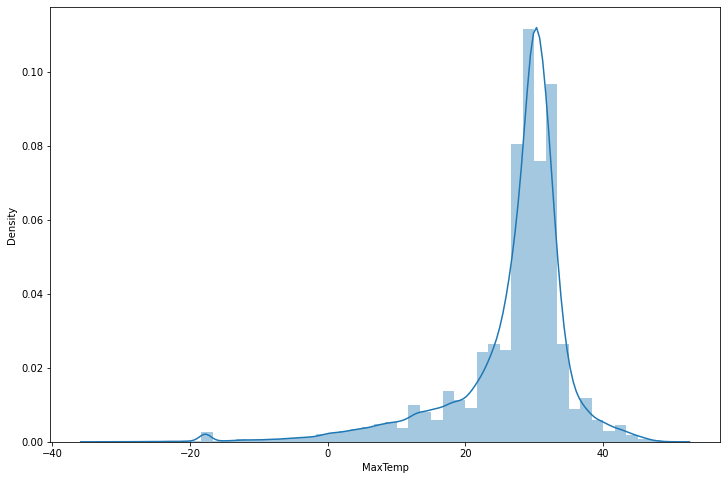

In [11]:
plt.figure(figsize=(12,8))
sns.distplot(df['MaxTemp'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


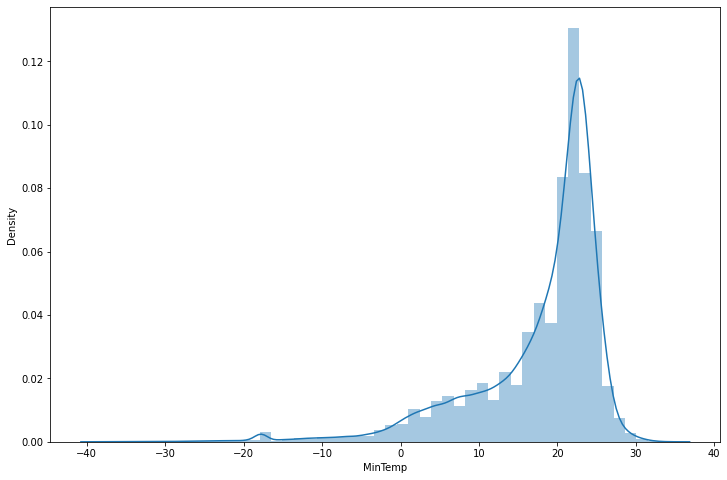

In [12]:
plt.figure(figsize=(12,8))
sns.distplot(df['MinTemp'])

In [13]:
X=df['MinTemp'].values.reshape(-1,1)
y=df['MaxTemp'].values.reshape(-1,1)

In [14]:
df['MinTemp'].values.reshape(-1,1)

array([[22.22222222],
       [21.66666667],
       [22.22222222],
       ...,
       [18.33333333],
       [18.33333333],
       [17.22222222]])

In [15]:
X

array([[22.22222222],
       [21.66666667],
       [22.22222222],
       ...,
       [18.33333333],
       [18.33333333],
       [17.22222222]])

In [16]:
y

array([[25.55555556],
       [28.88888889],
       [26.11111111],
       ...,
       [28.33333333],
       [28.33333333],
       [29.44444444]])

# y=aX+b

X= Min temp
y= Max temp

Prediting Max Temp from Given Min Temp

#### use library sci-kit learn

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [21]:
X.shape # MinTemp

(119040, 1)

In [22]:
y.shape # MaxTemp

(119040, 1)

### Training & Testing data

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [29]:
X_train.shape

(95232, 1)

In [25]:
X_test.shape

(23808, 1)

In [26]:
y_train.shape

(95232, 1)

In [27]:
y_test.shape

(23808, 1)

# Regression Model

In [30]:
model=LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [31]:
print(model.intercept_) # b

[10.66185201]


In [32]:
print(model.coef_) # a

[[0.92033997]]


## y=0.92*X+10.66

## Predict on Testing Data Set

In [33]:
y_pred = model.predict(X_test)

In [34]:
y_pred.shape

(23808, 1)

In [35]:
y_pred

array([[33.67035117],
       [30.0912513 ],
       [26.51215143],
       ...,
       [32.64775121],
       [30.60255128],
       [31.62515124]])

## Comparison

In [36]:
comp=pd.DataFrame({'X-Test':X_test.flatten(), 'y_test':y_test.flatten(), 'y_pred':y_pred.flatten()})

In [37]:
comp

,X-Test,y_test,y_pred
0,25.000000,28.888889,33.670351
1,21.111111,31.111111,30.091251
2,17.222222,27.222222,26.512151
3,22.222222,28.888889,31.113851
4,5.555556,23.333333,15.774852
...,...,...,...
23803,23.333333,32.777778,32.136451
23804,20.000000,32.222222,29.068651
23805,23.888889,31.111111,32.647751
23806,21.666667,31.111111,30.602551


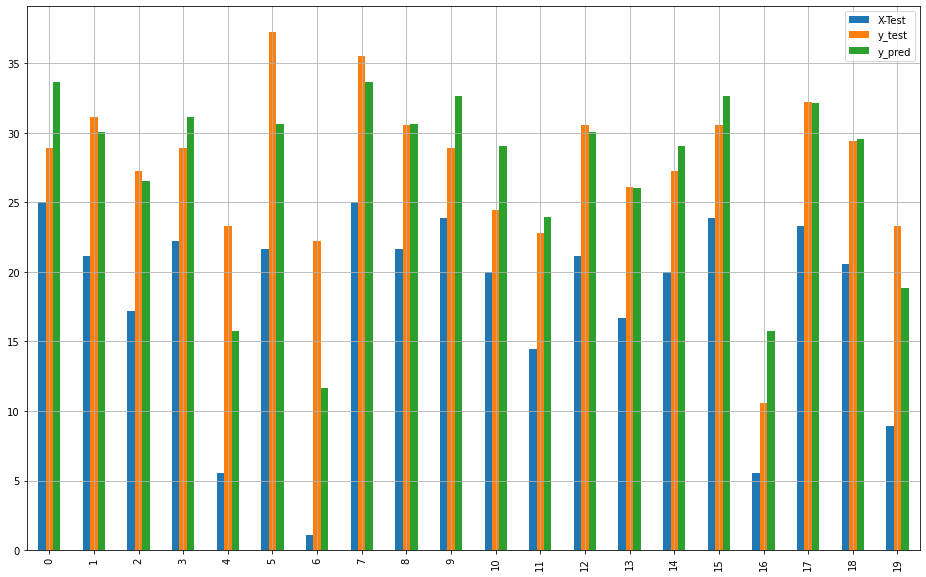

In [38]:
comp=comp.head(20)
comp.plot(kind='bar', figsize=(16,10))
plt.grid(True)
plt.show()

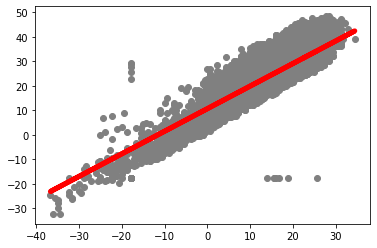

In [39]:
plt.scatter(X_test, y_test, color='gray')
plt.plot(X_test, y_pred, color='red', linewidth=5)
plt.show()

# Evaluation Metrics

In [40]:
from sklearn import metrics

In [41]:
print("Mean Absolute Error: ",metrics.mean_absolute_error(y_test, y_pred))
print("Mean Squeared Error: ",metrics.mean_squared_error(y_test, y_pred))
print("Root Mean Squeared Error: ",np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error:  3.19932917837853
Mean Squeared Error:  17.631568097568447
Root Mean Squeared Error:  4.198996082109204
